In [1]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from utils import classification_evaluation, user_input, pipe_model

In [2]:
dataframe =  pd.read_csv('../data/cleaned_dataset_2.csv')

In [3]:
X1, y1 = dataframe.drop("cardio", axis=1), dataframe["cardio"]
# use the same test set as in previous lecture
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3)

In [4]:
X_train_for_val, X_val, y_train_for_val, y_val = train_test_split(X_train, y_train, test_size=0.2)

X_train_for_val.shape, X_val.shape, y_train_for_val.shape, y_val.shape

((25369, 12), (6343, 12), (25369,), (6343,))

## Standard scaler

In [5]:
scaler = StandardScaler()

param_grid_decision_tree = {"dt__max_depth": [3, 5, 7], "dt__min_samples_leaf": [2, 4, 6]}
pipeline_decision_tree = Pipeline([("scaler", scaler), ("dt", DecisionTreeClassifier())])

classifier_decision_tree = GridSearchCV(
    estimator=pipeline_decision_tree,
    param_grid=param_grid_decision_tree,
    cv=5,
    scoring="accuracy",
)

In [6]:
classifier_decision_tree.fit(X_train_for_val, y_train_for_val)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('dt', DecisionTreeClassifier())]),
             param_grid={'dt__max_depth': [3, 5, 7],
                         'dt__min_samples_leaf': [2, 4, 6]},
             scoring='accuracy')

              precision    recall  f1-score   support

           0       0.71      0.79      0.75      3313
           1       0.74      0.65      0.69      3030

    accuracy                           0.72      6343
   macro avg       0.73      0.72      0.72      6343
weighted avg       0.73      0.72      0.72      6343



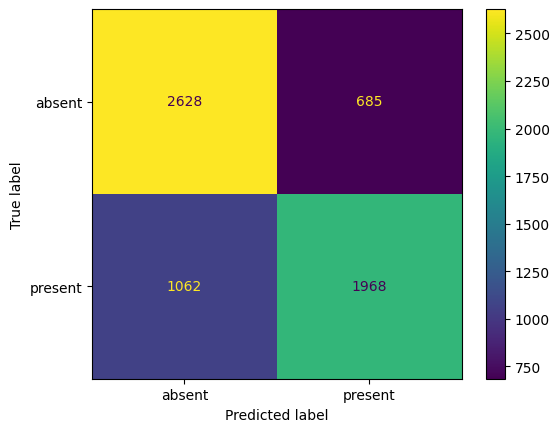

In [7]:
classification_evaluation(model=classifier_decision_tree, x_test=X_val, y_test=y_val)

In [8]:
classifier_decision_tree.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('dt', DecisionTreeClassifier(max_depth=5, min_samples_leaf=2))],
 'verbose': False,
 'scaler': StandardScaler(),
 'dt': DecisionTreeClassifier(max_depth=5, min_samples_leaf=2),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'dt__ccp_alpha': 0.0,
 'dt__class_weight': None,
 'dt__criterion': 'gini',
 'dt__max_depth': 5,
 'dt__max_features': None,
 'dt__max_leaf_nodes': None,
 'dt__min_impurity_decrease': 0.0,
 'dt__min_samples_leaf': 2,
 'dt__min_samples_split': 2,
 'dt__min_weight_fraction_leaf': 0.0,
 'dt__random_state': None,
 'dt__splitter': 'best'}

In [9]:
#Training entire X_train dataset

classifier_decision_tree.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('dt', DecisionTreeClassifier())]),
             param_grid={'dt__max_depth': [3, 5, 7],
                         'dt__min_samples_leaf': [2, 4, 6]},
             scoring='accuracy')

In [10]:
y_predictions = classifier_decision_tree.predict(X_test)

In [11]:
print(y_predictions[:10], y_test[:10].to_list())

[0 0 1 1 1 1 1 0 1 1] [1, 0, 1, 1, 1, 0, 0, 1, 0, 1]


---

## Normalisatin scaler

In [12]:
scaler_min = StandardScaler()

param_grid_decision_tree = {"dt__max_depth": [3, 5, 7], "dt__min_samples_leaf": [2, 4, 6]}
pipeline_decision_tree = Pipeline([("scaler", scaler_min), ("dt", DecisionTreeClassifier())])

classifier_decision_tree_min = GridSearchCV(
    estimator=pipeline_decision_tree,
    param_grid=param_grid_decision_tree,
    cv=5,
    scoring="accuracy",
)

In [13]:
classifier_decision_tree_min.fit(X_train_for_val, y_train_for_val)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('dt', DecisionTreeClassifier())]),
             param_grid={'dt__max_depth': [3, 5, 7],
                         'dt__min_samples_leaf': [2, 4, 6]},
             scoring='accuracy')

              precision    recall  f1-score   support

           0       0.71      0.79      0.75      3313
           1       0.74      0.65      0.69      3030

    accuracy                           0.72      6343
   macro avg       0.73      0.72      0.72      6343
weighted avg       0.73      0.72      0.72      6343



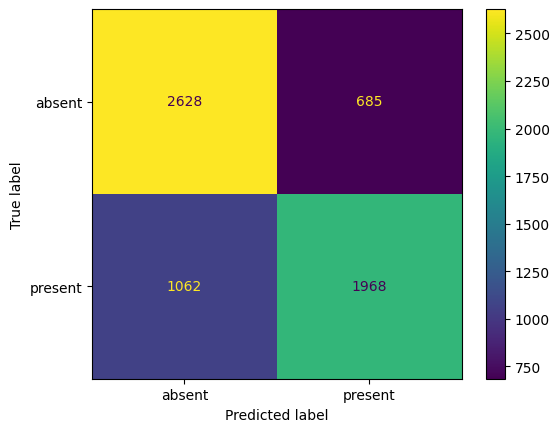

In [14]:
classification_evaluation(model=classifier_decision_tree_min, x_test=X_val, y_test=y_val)

In [15]:
classifier_decision_tree_min.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('dt', DecisionTreeClassifier())]),
             param_grid={'dt__max_depth': [3, 5, 7],
                         'dt__min_samples_leaf': [2, 4, 6]},
             scoring='accuracy')

In [16]:
y_predictions_min = classifier_decision_tree_min.predict(X_test)

In [17]:
print(y_predictions_min[:10], y_test[:10].to_list())

[0 0 1 1 1 1 1 0 1 1] [1, 0, 1, 1, 1, 0, 0, 1, 0, 1]


----

## Dataframe 2

### Standard scaler

In [18]:
dataframe_2 = pd.read_csv('../data/cleaned_dataset_1.csv')
X2, y2 = dataframe.drop("cardio", axis=1), dataframe["cardio"]

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3)
X2_train_for_val, X2_val, y2_train_for_val, y2_val = train_test_split(X2_train, y2_train, test_size=0.2)

X2_train_for_val.shape, X2_val.shape, y2_train_for_val.shape, y2_val.shape

((25369, 12), (6343, 12), (25369,), (6343,))

In [19]:
classifier_decision_tree.fit(X2_train_for_val, y2_train_for_val)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('dt', DecisionTreeClassifier())]),
             param_grid={'dt__max_depth': [3, 5, 7],
                         'dt__min_samples_leaf': [2, 4, 6]},
             scoring='accuracy')

              precision    recall  f1-score   support

           0       0.71      0.80      0.75      3214
           1       0.76      0.66      0.71      3129

    accuracy                           0.73      6343
   macro avg       0.73      0.73      0.73      6343
weighted avg       0.73      0.73      0.73      6343



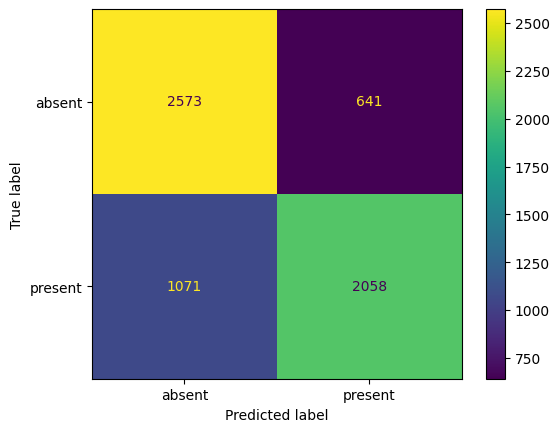

In [20]:
classification_evaluation(model=classifier_decision_tree, x_test=X2_val, y_test=y2_val)

In [21]:
classifier_decision_tree.fit(X2_train, y2_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('dt', DecisionTreeClassifier())]),
             param_grid={'dt__max_depth': [3, 5, 7],
                         'dt__min_samples_leaf': [2, 4, 6]},
             scoring='accuracy')

In [22]:
y_predictions = classifier_decision_tree.predict(X2_test)

In [23]:
print(y_predictions[:10], y2_test[:10].to_list())

[1 0 0 1 1 0 0 0 0 0] [0, 0, 0, 1, 1, 0, 0, 0, 0, 1]


### Using normalisation for dataset 2

In [24]:
classifier_decision_tree_min.fit(X2_train_for_val, y2_train_for_val)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('dt', DecisionTreeClassifier())]),
             param_grid={'dt__max_depth': [3, 5, 7],
                         'dt__min_samples_leaf': [2, 4, 6]},
             scoring='accuracy')

              precision    recall  f1-score   support

           0       0.71      0.80      0.75      3214
           1       0.76      0.66      0.71      3129

    accuracy                           0.73      6343
   macro avg       0.73      0.73      0.73      6343
weighted avg       0.73      0.73      0.73      6343



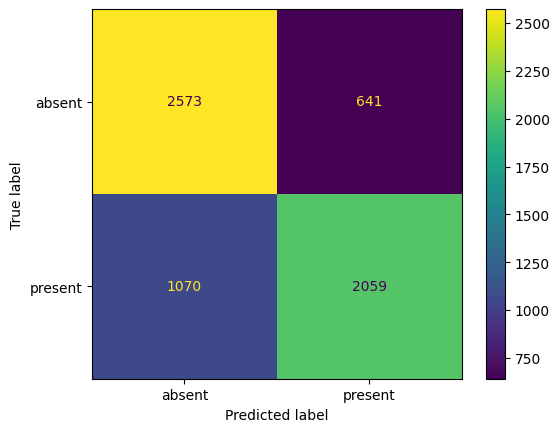

In [25]:
classification_evaluation(model=classifier_decision_tree_min, x_test=X2_val, y_test=y2_val)


In [26]:
classifier_decision_tree_min.fit(X2_train, y2_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('dt', DecisionTreeClassifier())]),
             param_grid={'dt__max_depth': [3, 5, 7],
                         'dt__min_samples_leaf': [2, 4, 6]},
             scoring='accuracy')

In [27]:
y_predictions_min = classifier_decision_tree_min.predict(X2_test)

In [28]:
print(y_predictions_min[:10], y2_test[:10].to_list())

[1 0 0 1 1 0 0 0 0 0] [0, 0, 0, 1, 1, 0, 0, 0, 0, 1]
